In [104]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from remd_distributions import read_gyration_data

sns.set_style("darkgrid")

In [109]:
def read_rmsd_data(document_name):
    x, y = [], []
    with open(document_name) as f:
        for line in f:
            cols = line.split()

            if len(cols) == 2:
                x.append(float(cols[0]))
                y.append(abs(float(cols[1])))
    return x, y

# RMSD Autocorrelation

### Import RMSD data

In [110]:
t, rmsd_it_wt = read_rmsd_data("../tremd/rmsd_it_wt_remd_500ns.xvg")
_, rmsd_it_k = read_rmsd_data("../tremd/rmsd_it_k_remd_500ns.xvg")

_, rmsd_m_wt = read_rmsd_data("../tremd/rmsd_m_wt_remd_500ns.xvg")
_, rmsd_m_k = read_rmsd_data("../tremd/rmsd_m_k_remd_500ns.xvg")

_, rmsd_r_wt = read_rmsd_data("../tremd/rmsd_trros_wt_remd_500ns.xvg")
_, rmsd_r_k = read_rmsd_data("../tremd/rmsd_trros_k_remd_500ns.xvg")

In [111]:
rmsd_it_wt_df = pd.DataFrame({"RMSD": rmsd_it_wt})
rmsd_it_wt_df.index = pd.Index(t)

rmsd_it_k_df = pd.DataFrame({"RMSD": rmsd_it_k})
rmsd_it_k_df.index = pd.Index(t)

rmsd_m_wt_df = pd.DataFrame({"RMSD": rmsd_m_wt})
rmsd_m_wt_df.index = pd.Index(t)

rmsd_m_k_df = pd.DataFrame({"RMSD": rmsd_m_k})
rmsd_m_k_df.index = pd.Index(t)

rmsd_r_wt_df = pd.DataFrame({"RMSD": rmsd_r_wt})
rmsd_r_wt_df.index = pd.Index(t)

rmsd_r_k_df = pd.DataFrame({"RMSD": rmsd_r_k})
rmsd_r_k_df.index = pd.Index(t)

### PLOT

### I-TASSER

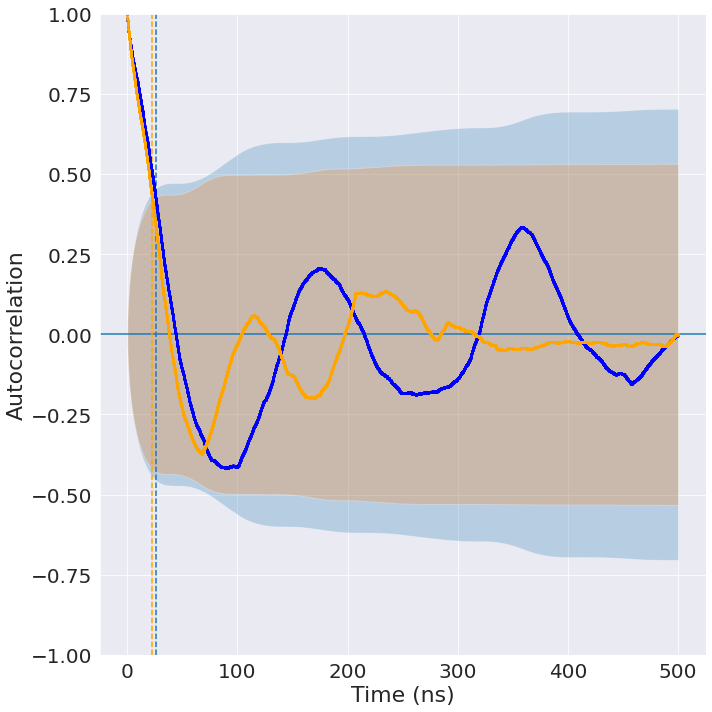

In [148]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axhline(y=0)

# Autocorrelation times
ax.axvline(x=265, linestyle='dashed')
ax.axvline(x=225, color="orange", linestyle='dashed')

# The red shaded region is the confidence interval with a default value of α = 0.05 (95% confidence).
# Anything within this range represents a value that has no significant correlation with the most recent value.
plot_acf(x=rmsd_it_wt_df, lags=len(rmsd_it_wt)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="wt",
         color="blue", markersize=2)

plot_acf(x=rmsd_it_k_df, lags=len(rmsd_it_k)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="K141E",
         color="orange", markersize=2)

# ax.legend(fontsize=20)

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Autocorrelation', size=22)
ax.set_title("", size=1)

fig.tight_layout()

fig.savefig("Autocorr_it_rmsd.png", dpi=320)

Il tempo di autocorrelazione è il tempo corrispondente al momento in cui la curva di autocorrelazione entra nell'intervallo di confidenza

### MODELLER

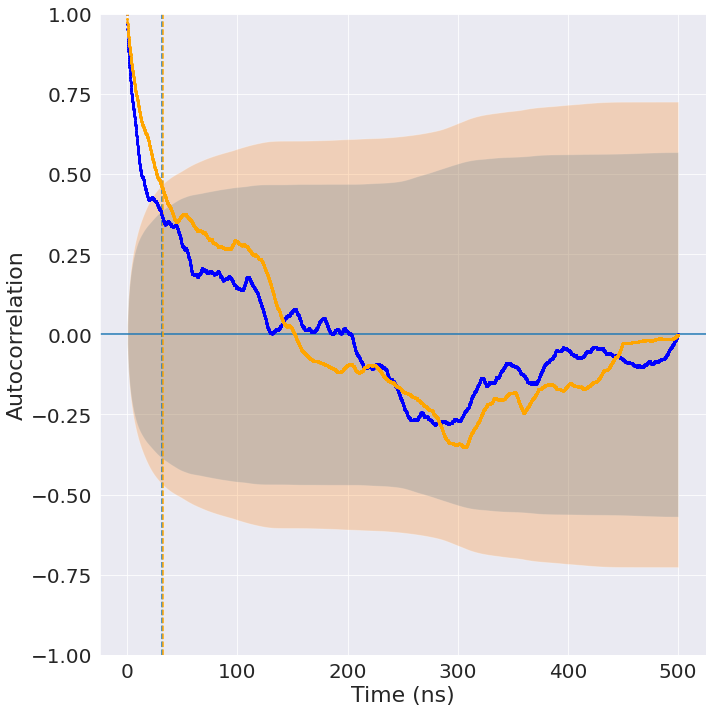

In [150]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axhline(y=0)

ax.axvline(x=315, linestyle='dashed')
ax.axvline(x=322, color="orange", linestyle='dashed')

plot_acf(x=rmsd_m_wt_df, lags=len(rmsd_m_wt)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="wt",
         color="blue", markersize=2)

plot_acf(x=rmsd_m_k_df, lags=len(rmsd_m_k)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="K141E",
         color="orange", markersize=2)

# ax.legend(fontsize=20)

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Autocorrelation', size=22)
ax.set_title("", size=1)

fig.tight_layout()

fig.savefig("Autocorr_m_rmsd.png", dpi=320)

### ROSETTA

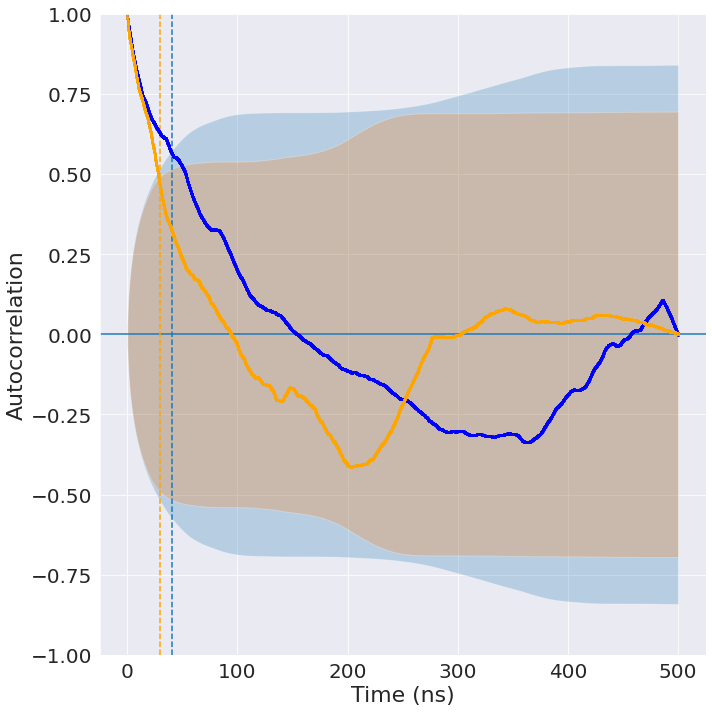

In [149]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axhline(y=0)

ax.axvline(x=410, linestyle='dashed')
ax.axvline(x=295, color="orange", linestyle='dashed')

plot_acf(x=rmsd_r_wt_df, lags=len(rmsd_r_wt)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="wt",
         color="blue", markersize=2)

plot_acf(x=rmsd_r_k_df, lags=len(rmsd_r_k)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="K141E",
         color="orange", markersize=2)

# ax.legend(fontsize=20)

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Autocorrelation', size=22)
ax.set_title("", size=1)

fig.tight_layout()

fig.savefig("Autocorr_r_rmsd.png", dpi=320)

# Rg Autocorrelation

## Import Gyration data

In [8]:
_, gyr_it_wt = read_gyration_data("../tremd/gyrate_it_wt_remd_500ns.xvg")
_, gyr_it_k = read_gyration_data("../tremd/gyrate_it_k_remd_500ns.xvg")

_, gyr_m_wt = read_gyration_data("../tremd/gyrate_m_wt_remd_500ns.xvg")
_, gyr_m_k = read_gyration_data("../tremd/gyrate_m_k_remd_500ns.xvg")

_, gyr_r_wt = read_gyration_data("../tremd/gyrate_trros_wt_remd_500ns.xvg")
_, gyr_r_k = read_gyration_data("../tremd/gyrate_trros_k_remd_500ns.xvg")

In [9]:
gyr_it_wt_df = pd.DataFrame({"Rg": gyr_it_wt})
gyr_it_wt_df.index = pd.Index(t)

gyr_it_k_df = pd.DataFrame({"Rg": gyr_it_k})
gyr_it_k_df.index = pd.Index(t)

gyr_m_wt_df = pd.DataFrame({"Rg": gyr_m_wt})
gyr_m_wt_df.index = pd.Index(t)

gyr_m_k_df = pd.DataFrame({"Rg": gyr_m_k})
gyr_m_k_df.index = pd.Index(t)

gyr_r_wt_df = pd.DataFrame({"Rg": gyr_r_wt})
gyr_r_wt_df.index = pd.Index(t)

gyr_r_k_df = pd.DataFrame({"Rg": gyr_r_k})
gyr_r_k_df.index = pd.Index(t)

## PLOT

## I-TASSER

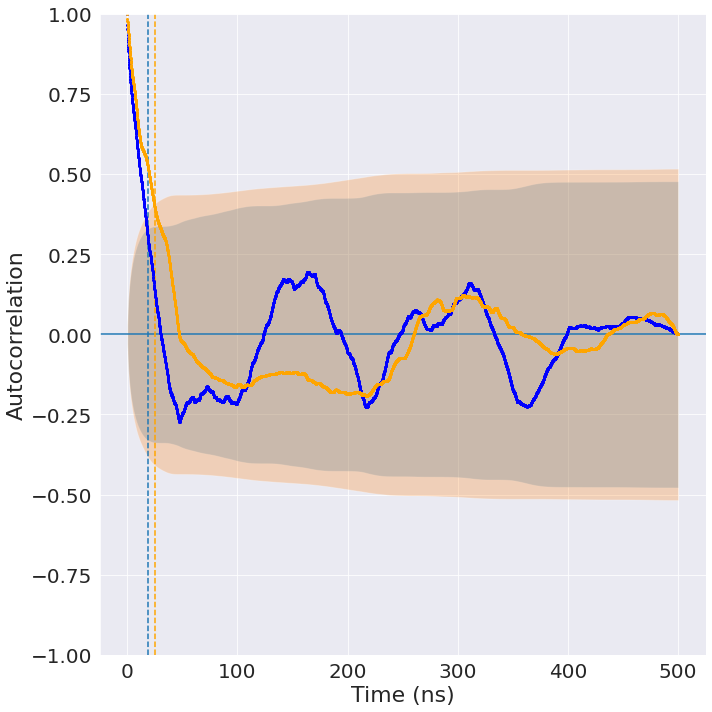

In [151]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axhline(y=0)

ax.axvline(x=190, linestyle='dashed')
ax.axvline(x=255, color="orange", linestyle='dashed')

# The red shaded region is the confidence interval with a default value of α = 0.05 (95% confidence).
# Anything within this range represents a value that has no significant correlation with the most recent value.
plot_acf(x=gyr_it_wt_df, lags=len(gyr_it_wt)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="wt",
         color="blue", markersize=2)

plot_acf(x=gyr_it_k_df, lags=len(gyr_it_k)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="K141E",
         color="orange", markersize=2)

# ax.legend(fontsize=20)

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Autocorrelation', size=22)
ax.set_title("", size=1)

fig.tight_layout()

fig.savefig("Autocorr_it_gyr.png", dpi=320)

## MODELLER

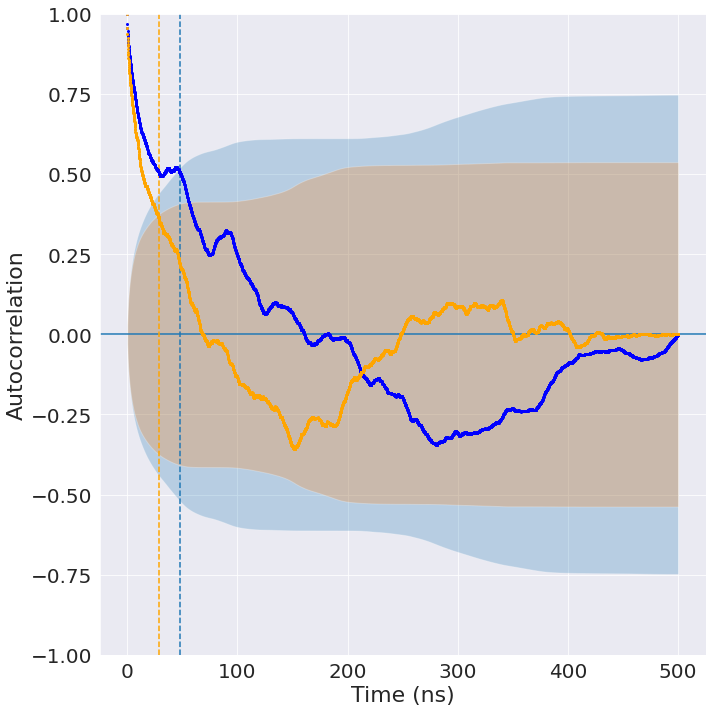

In [152]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axhline(y=0)

ax.axvline(x=480, linestyle='dashed')
ax.axvline(x=290, color="orange", linestyle='dashed')

# The red shaded region is the confidence interval with a default value of α = 0.05 (95% confidence).
# Anything within this range represents a value that has no significant correlation with the most recent value.
plot_acf(x=gyr_m_wt_df, lags=len(gyr_m_wt)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="wt",
         color="blue", markersize=2)

plot_acf(x=gyr_m_k_df, lags=len(gyr_m_k)-1, ax=ax, alpha=0.05,
         use_vlines=False, label="K141E",
         color="orange", markersize=2)

# ax.legend(fontsize=20)

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Autocorrelation', size=22)
ax.set_title("", size=1)

fig.tight_layout()

fig.savefig("Autocorr_m_gyr.png", dpi=320)

## ROSETTA

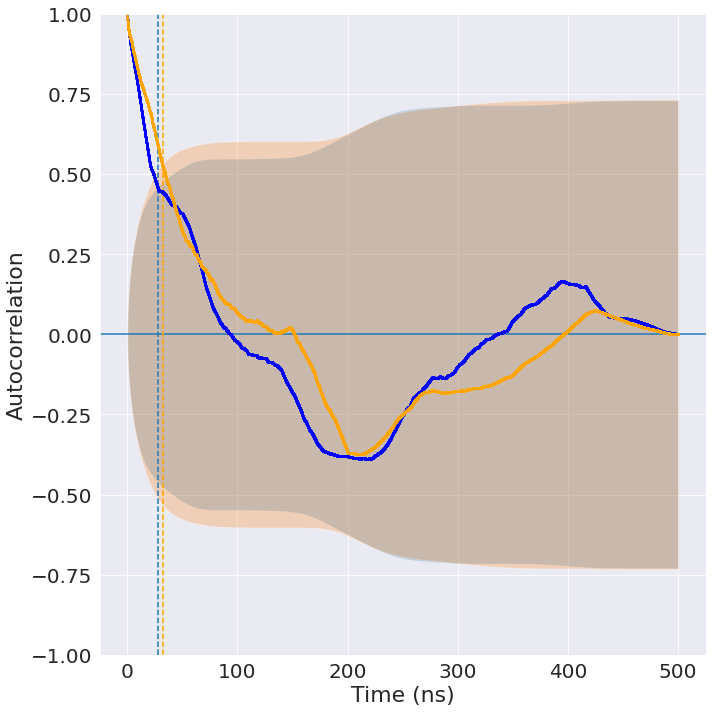

In [153]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.axhline(y=0)

ax.axvline(x=275, linestyle='dashed')
ax.axvline(x=325, color="orange", linestyle='dashed')

# The red shaded region is the confidence interval with a default value of α = 0.05 (95% confidence).
# Anything within this range represents a value that has no significant correlation with the most recent value.
plot_acf(x=gyr_r_wt_df, ax=ax, lags=len(gyr_r_k)-1, alpha=0.05,
         use_vlines=False, label="wt",
         color="blue", markersize=2)

plot_acf(x=gyr_r_k_df, ax=ax, lags=len(gyr_r_k)-1, alpha=0.05,
         use_vlines=False, label="K141E",
         color="orange", markersize=2)

# ax.legend(fontsize=20)

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Autocorrelation', size=22)
ax.set_title("", size=1)

fig.tight_layout()

fig.savefig("Autocorr_r_gyr.png", dpi=320)

## RMSD timeline

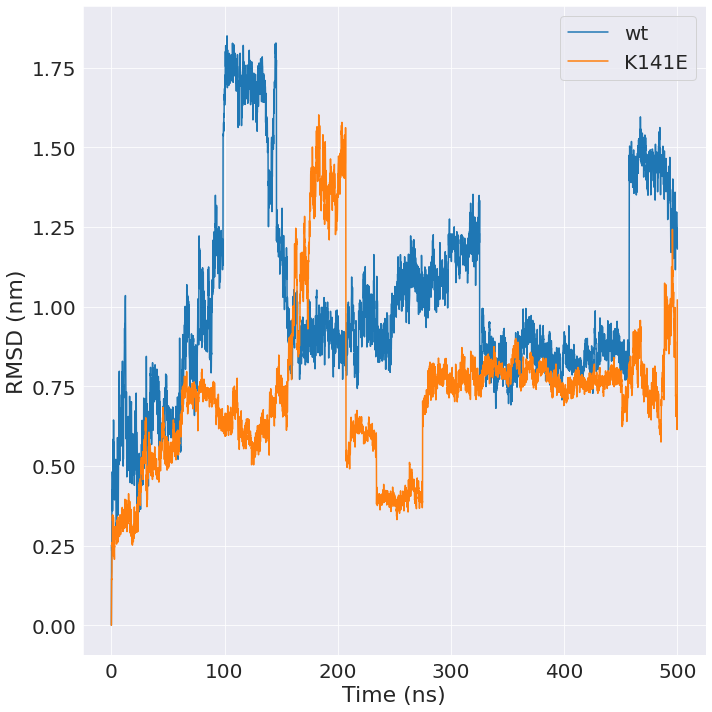

In [134]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(rmsd_it_wt, label='wt')
ax.plot(rmsd_it_k, label='K141E')

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('RMSD (nm)', size=22)

ax.legend(fontsize=20)

fig.tight_layout()

fig.savefig("rmsd_it.png", dpi=320)

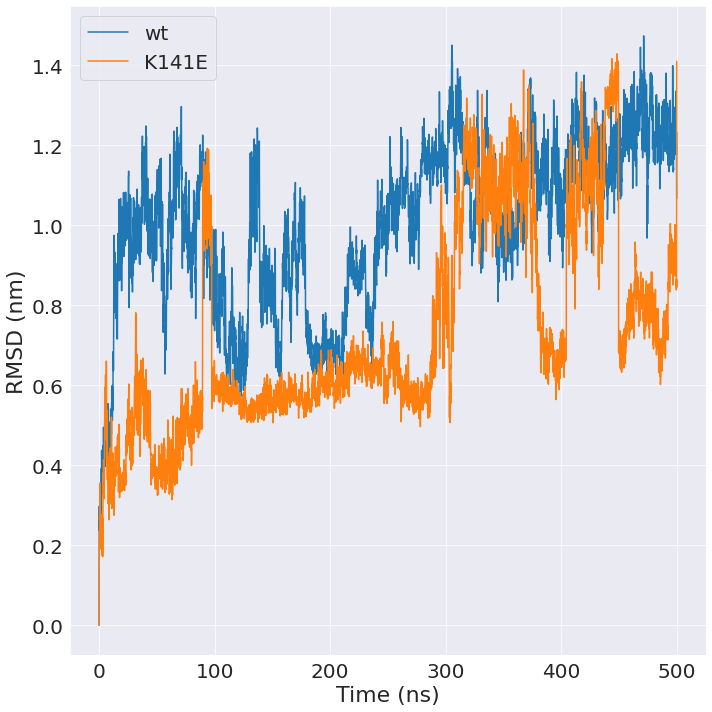

In [135]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(rmsd_m_wt, label='wt')
ax.plot(rmsd_m_k, label='K141E')

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('RMSD (nm)', size=22)

ax.legend(fontsize=20)

fig.tight_layout()

fig.savefig("rmsd_m.png", dpi=320)

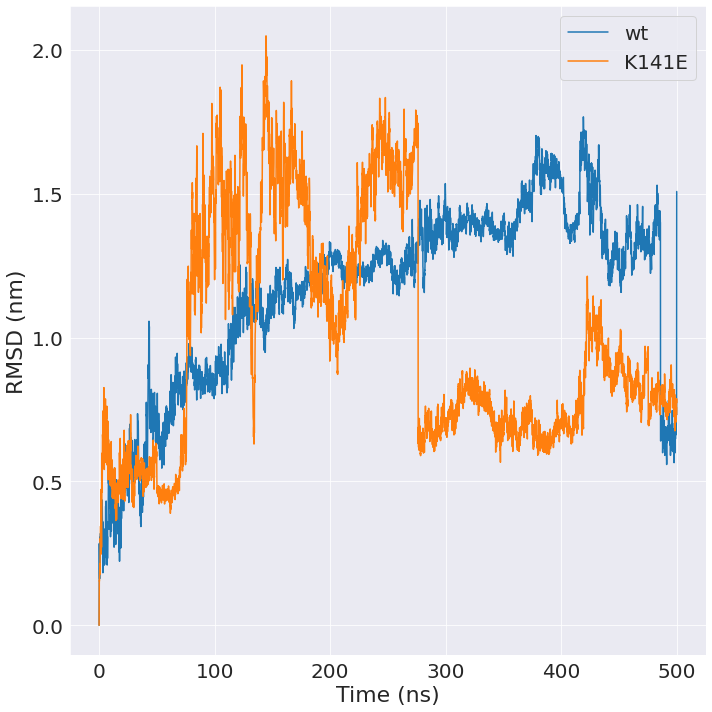

In [136]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(rmsd_r_wt, label='wt')
ax.plot(rmsd_r_k, label='K141E')

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('RMSD (nm)', size=22)

ax.legend(fontsize=20)

fig.tight_layout()

fig.savefig("rmsd_r.png", dpi=320)

## Rg Timeline

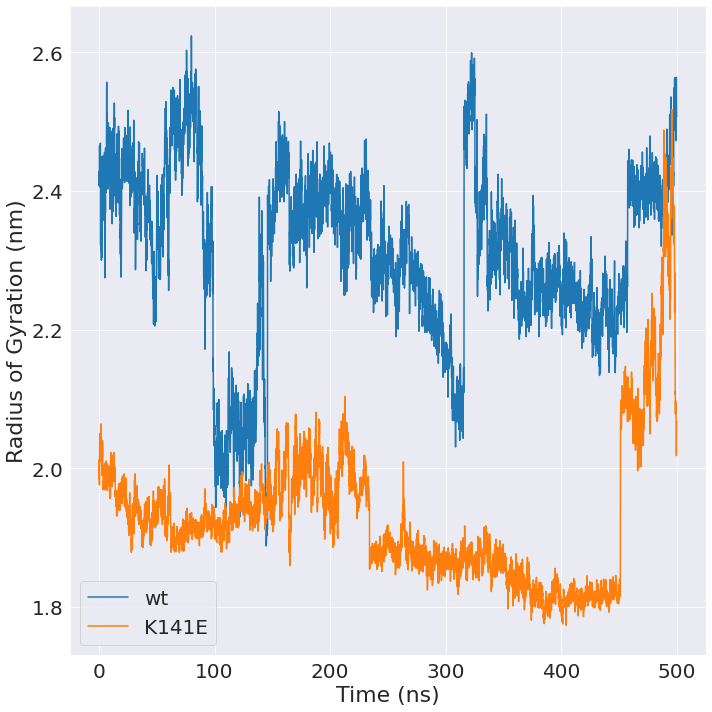

In [137]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(gyr_it_wt, label='wt')
ax.plot(gyr_it_k, label='K141E')

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Radius of Gyration (nm)', size=22)

ax.legend(fontsize=20)

fig.tight_layout()

fig.savefig("gyr_it.png", dpi=320)

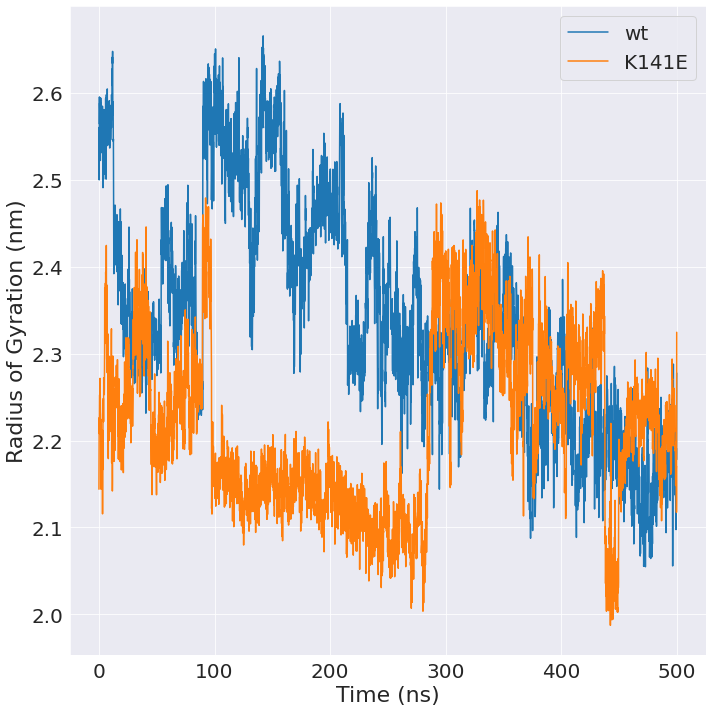

In [138]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(gyr_m_wt, label='wt')
ax.plot(gyr_m_k, label='K141E')

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Radius of Gyration (nm)', size=22)

ax.legend(fontsize=20)

fig.tight_layout()

fig.savefig("gyr_m.png", dpi=320)

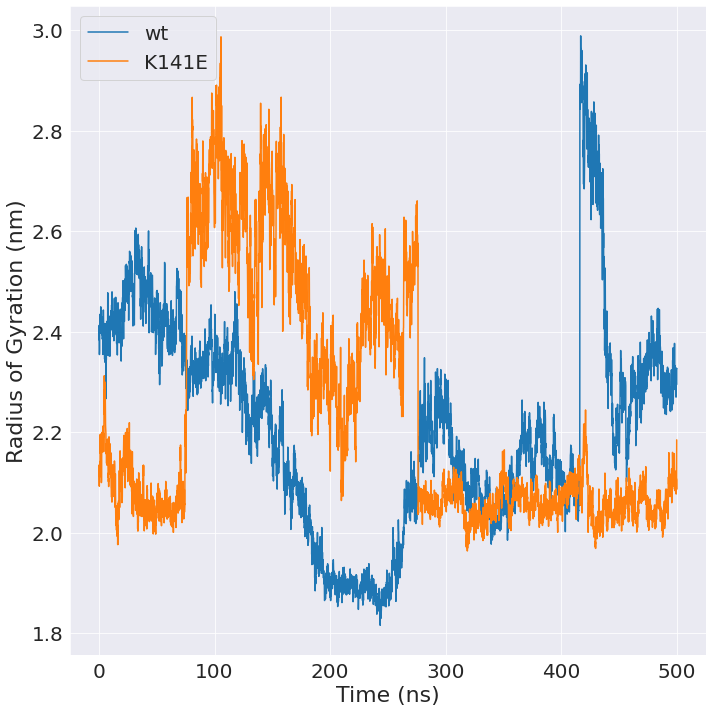

In [139]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.plot(gyr_r_wt, label='wt')
ax.plot(gyr_r_k, label='K141E')

ax.set_xticks([0, 1000, 2000, 3000, 4000, 5000])
ax.set_xticklabels([0, 100, 200, 300, 400, 500])

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(20)

ax.set_xlabel('Time (ns)', size=22)
ax.set_ylabel('Radius of Gyration (nm)', size=22)

fig.tight_layout()

ax.legend(fontsize=20)

fig.savefig("gyr_r.png", dpi=320)